In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [18]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
training = training.iloc[:, 1:]
test = test.iloc[:, 1:]

## LDA - Checks on the assumptions

In [19]:
import scipy.stats as stats, pingouin as pg

training.head()

for i in range(5, 69):
    stat, p = stats.shapiro(training.iloc[:, i])
    print(f'Shapiro-Wilk Test per il predittore {training.columns.tolist()[i]} : statistic={stat}, p-value={p}')
print('-------------')


for kingdom in np.unique(training.loc[:, "Kingdom"]):
    hz_test = pg.multivariate_normality(training[training.loc[:, 'Kingdom']==kingdom].iloc[:, 5:])
    print(f" {kingdom} ", hz_test)

C:\Users\comin\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10422.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test per il predittore UUU : statistic=0.9054994184280138, p-value=4.257669043309575e-62
Shapiro-Wilk Test per il predittore UUC : statistic=0.9551949725089622, p-value=1.676723905259903e-48
Shapiro-Wilk Test per il predittore UUA : statistic=0.8155942392754635, p-value=9.559637800631016e-76
Shapiro-Wilk Test per il predittore UUG : statistic=0.9448560576517517, p-value=4.128474666010395e-52
Shapiro-Wilk Test per il predittore CUU : statistic=0.9077502900317171, p-value=1.2456061311844652e-61
Shapiro-Wilk Test per il predittore CUC : statistic=0.9135492720153658, p-value=2.197810633947521e-60
Shapiro-Wilk Test per il predittore CUA : statistic=0.687806285081001, p-value=1.7921157801309084e-87
Shapiro-Wilk Test per il predittore CUG : statistic=0.8392175243101743, p-value=7.80650486176479e-73
Shapiro-Wilk Test per il predittore AUU : statistic=0.921394203675499, p-value=1.3960381012415017e-58
Shapiro-Wilk Test per il predittore AUC : statistic=0.9187381431567672, p-value=3.

Statistiche KS: 0.09841099355211175
P-value: [2.596234545593137e-88]
Statistiche KS: 0.0672520228013701
P-value: [1.9883532201936323e-41]
Statistiche KS: 0.16023350523070973
P-value: [3.1297406126884806e-234]
Statistiche KS: 0.0640096349701275
P-value: [1.4437307964541036e-37]
Statistiche KS: 0.08367013011915947
P-value: [6.39522641079923e-64]
Statistiche KS: 0.09812650971897208
P-value: [8.370332794695435e-88]
Statistiche KS: 0.2840351314565521
P-value: [0.0]
Statistiche KS: 0.16186128780579223
P-value: [4.932425141208464e-239]
Statistiche KS: 0.07485444220484372
P-value: [3.1229919515497475e-51]
Statistiche KS: 0.10381713549862348
P-value: [2.956723174813908e-98]
Statistiche KS: 0.1277699781971462
P-value: [8.783628425456983e-149]
Statistiche KS: 0.05276200986413404
P-value: [1.1755216410368759e-25]
Statistiche KS: 0.1041163818489857
P-value: [8.03032129662076e-99]
Statistiche KS: 0.09460220608960257
P-value: [1.2529707150711405e-81]
Statistiche KS: 0.05549785434730348
P-value: [2.42

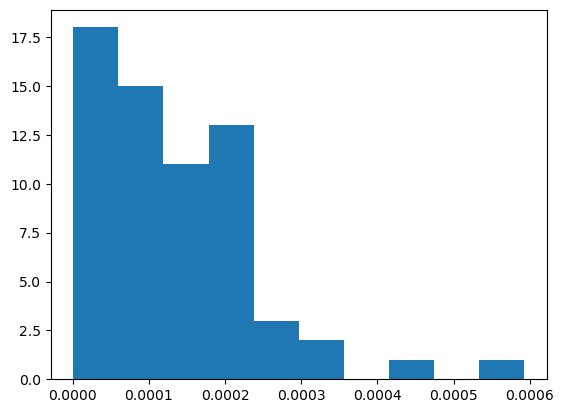

In [28]:
# Marco
# VARIANCE OF EACH VARIABLE

codons_variance = np.var(training.iloc[:, 5:], axis = 0)
plt.hist(codons_variance, bins = 10)

# Uso un test diverso dallo Shapiro-Wilk per testare la Normalità dei dati

for col in range(5, 69):
    mean = np.mean(training.iloc[:, col])
    std = np.std(training.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(training.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: [{p_value}]")     #Tutti rifiutano l'ipotesi di Normalità

In [30]:
from sklearn import preprocessing
    
normalized_training = pd.DataFrame(preprocessing.normalize(training.iloc[:, 5:], axis = 1))
for col in range(normalized_training.shape[1]):
    mean = np.mean(normalized_training.iloc[:, col])
    std = np.std(normalized_training.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(normalized_training.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: [{p_value}]")     #Tutti rifiutano l'ipotesi di Normalità


Statistiche KS: 0.08623260464029536
P-value: [7.1007622688021306e-68]
Statistiche KS: 0.03527992982328121
P-value: [1.0485975399092916e-11]
Statistiche KS: 0.12762454397762096
P-value: [1.916081640638477e-148]
Statistiche KS: 0.06327325660729322
P-value: [1.0225494107554249e-36]
Statistiche KS: 0.06500011664086514
P-value: [1.0007841112760571e-38]
Statistiche KS: 0.08641450848752552
P-value: [3.681438698350201e-68]
Statistiche KS: 0.2628329899320573
P-value: [0.0]
Statistiche KS: 0.14483000132245905
P-value: [3.064571191811143e-191]
Statistiche KS: 0.03094414567559601
P-value: [4.191200344363178e-09]
Statistiche KS: 0.06077385604796515
P-value: [6.634582806292272e-34]
Statistiche KS: 0.1026152138693101
P-value: [5.344287043270423e-96]
Statistiche KS: 0.057039982502285924
P-value: [6.473832950793767e-30]
Statistiche KS: 0.08885477500461669
P-value: [4.789931259478399e-72]
Statistiche KS: 0.060474775625735555
P-value: [1.4148178917390108e-33]
Statistiche KS: 0.04232466232254408
P-value: 

In [32]:
from sklearn import preprocessing
    
normalized_training_z = training.copy()
for col in range(5, 69):
    mean = np.mean(training.iloc[:, col])
    std = np.std(training.iloc[:, col])
    normalized_training_z.iloc[:, col] = (normalized_training_z.iloc[:, col] - mean)/std

normalized_training_z = normalized_training_z.iloc[:, 5:]
    
for col in range(normalized_training_z.shape[1]):
    mean = np.mean(normalized_training_z.iloc[:, col])
    std = np.std(normalized_training_z.iloc[:, col])
    cdf = lambda x: stats.norm.cdf(x, loc=mean, scale=std)
    ks_statistic, p_value = stats.kstest(normalized_training_z.iloc[:, col], cdf)
    print(f"Statistiche KS: {ks_statistic}")   
    print(f"P-value: [{p_value}]")     #Tutti rifiutano l'ipotesi di Normalità


Statistiche KS: 0.09841099355211175
P-value: [2.596234545593137e-88]
Statistiche KS: 0.0672520228013701
P-value: [1.9883532201936323e-41]
Statistiche KS: 0.16023350523070978
P-value: [3.129740612687307e-234]
Statistiche KS: 0.0640096349701275
P-value: [1.4437307964541036e-37]
Statistiche KS: 0.08367013011915947
P-value: [6.39522641079923e-64]
Statistiche KS: 0.09812650971897213
P-value: [8.370332794693526e-88]
Statistiche KS: 0.28403513145655207
P-value: [0.0]
Statistiche KS: 0.16186128780579223
P-value: [4.932425141208464e-239]
Statistiche KS: 0.07485444220484372
P-value: [3.1229919515497475e-51]
Statistiche KS: 0.10381713549862343
P-value: [2.956723174814622e-98]
Statistiche KS: 0.1277699781971462
P-value: [8.783628425456983e-149]
Statistiche KS: 0.05276200986413404
P-value: [1.1755216410368759e-25]
Statistiche KS: 0.10411638184898564
P-value: [8.030321296622704e-99]
Statistiche KS: 0.09460220608960268
P-value: [1.2529707150705897e-81]
Statistiche KS: 0.05549785434730348
P-value: [2.

## LDA - Checks on the outliers

In [11]:
import sklearn

training_with_outliers = training.copy()

for col in range(5, 69):
    considered_variable = training.iloc[:, col].copy()
    Q1 = considered_variable.quantile(0.25)
    Q3 = considered_variable.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    for idx, value in enumerate(considered_variable.tolist()):
        if value < lower or value > upper:
            considered_variable[idx] = True
        else: 
            considered_variable[idx] = False
    training_with_outliers.iloc[:, col] = considered_variable
        


C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: UUU, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: AUA, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: CCC, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: UCA, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: CAG, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  considered_variable[idx] = False
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4        False
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: CGC, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable
C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated

C:\Users\comin\AppData\Local\Temp\ipykernel_5180\2072908604.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        False
1        False
2        False
3        False
4         True
         ...  
10417    False
10418    False
10419    False
10420    False
10421    False
Name: UGA, Length: 10422, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  training_with_outliers.iloc[:, col] = considered_variable


In [12]:
lis = []
for row in range(training_with_outliers.shape[0]):
    lis.append(all(training_with_outliers.iloc[row, 5:]))
sum(lis)

0

## One-hot encoding of DNA type feature

In [13]:
def onehot_feature(pd_data, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = pd_data[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values) #when you use an array to index another array in NumPy, it selects rows from the indexed array based on the values in the index array. e[a] selects rows from the identity matrix e based on the values in array a
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    pd_data = pd_data.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        pd_data["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return pd_data

In [14]:
training = onehot_feature(training, 'DNAtype')
test = onehot_feature(test, 'DNAtype')

training = training.drop(["SpeciesID", "SpeciesName"], axis = 1)
test = test.drop(["SpeciesID", "SpeciesName"], axis = 1)

## Fitting of the model

We remove the AGA feature from the training set (we will use it at point 4.)

In the test set we add all 0 columns for the DNA type missing (given the fact that a sample with DNA type = 2, is for sure 0 for all others DNA types). We have to do this otherwise the function complains.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import re

# Divide il dataset in feature e target
X = training.drop(["Kingdom", "AGA"], axis = 1)  # Feature
y = training['Kingdom']  # Target

# Adding missing columns for DNA type
pattern = r'DNAtype_\d+'
set_colnames_training = set()
for col in training.columns.tolist():
    if re.match(pattern, col):
        set_colnames_training.add(col)
set_colnames_test = set()
for col in test.columns.tolist():
    if re.match(pattern, col):
        set_colnames_test.add(col)
missing_columns_in_test = list(set_colnames_training.difference(set_colnames_test.intersection(set_colnames_training)))
for col in missing_columns_in_test:
    test[col] = 0

X_test = test.drop(columns = ['Kingdom'])
y_test = test['Kingdom']

X_test = X_test[X.columns]


# Crea un'istanza del modello LDA
model = LDA(store_covariance=True)

# Addestra il modello LDA
model.fit(X, y)

# Valuta il modello
train_accuracy = accuracy_score(y, model.predict(X))

test_accuracy = accuracy_score(y_test, model.predict(X_test))

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Train accuracy: 0.8164459796584149
Test accuracy: 0.8069838833461244
